In [2]:
import numpy as np
import pandas as pd

In [8]:
def find_missing_values(df):
    try:

        missing = df.isnull().sum()
        missing = missing[missing >0]

        missing.sort_values(inplace = True)
        print(missing)

        missing.plot(kind = 'bar')
        plt.show()
        
    except:
        print("No missing values")
        
def missing_values_idx(df):
    
    missing = df.isnull().sum()
    missing = missing[missing >0]

    missing_col = missing.index

    for col in missing_col:
        missing_idx = df[col].isnull()
        missing_idx = missing_idx[missing_idx].index
        print(missing_idx, col)
        print("\\")

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
len(np.unique(test.VisitNumber))

95674

In [5]:
y = data.TripType
data = data.drop('TripType', axis = 1)

In [6]:
result = pd.concat([data,test], axis=0)
result.shape

(1300700, 6)

DepartmentDescription    2689
Upc                      8115
FinelineNumber           8115
dtype: int64


<IPython.core.display.Javascript object>


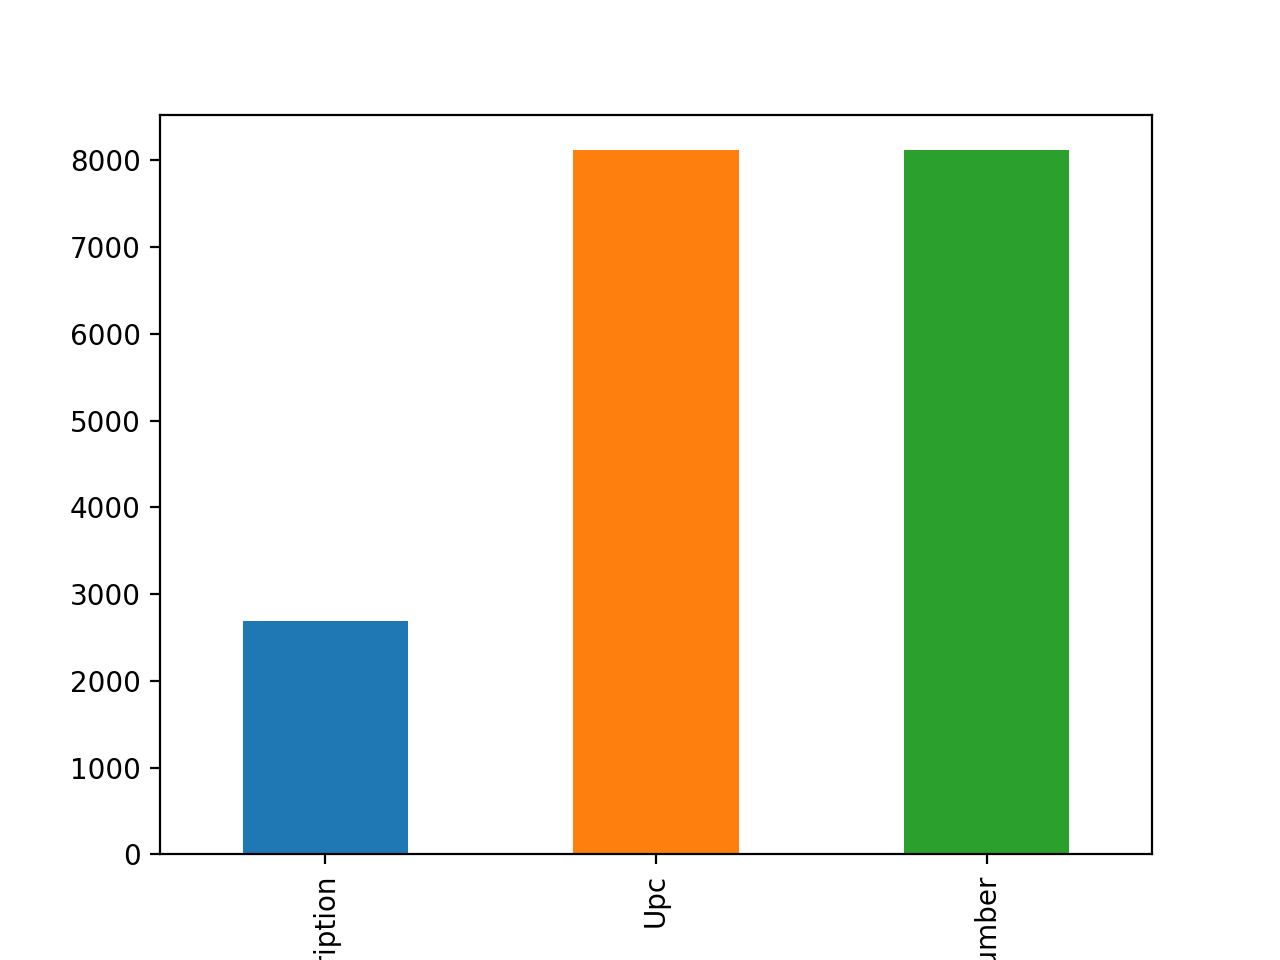

No missing values


In [9]:
find_missing_values(result)

In [9]:
result['Upc'] = result['Upc'].fillna(value = 9999,)
result['FinelineNumber'] = result['FinelineNumber'].fillna(value = 9999,)
result['DepartmentDescription'] = result['DepartmentDescription'].fillna(value = 'Nodata',)

find_missing_values(result)

Series([], dtype: int64)
No missing values


In [10]:
result['Weekday'] = result['Weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5,
"Saturday": 6, "Sunday": 7})

In [11]:
dummies = pd.get_dummies(result.DepartmentDescription)
# data[dummies.columns] = dummies
dummies.shape

(1300700, 68)

In [12]:
result[dummies.columns] = dummies

In [13]:
result.shape

(1300700, 74)

In [14]:
result.loc[result.ScanCount < 0, 'Return'] = 1
result.loc[result.Return != 1, 'Return'] = 0


In [15]:
result.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,...,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Return
0,5,5,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,7,5,6.053882e+10,1,SHOES,8931.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
2,7,5,7.410811e+09,1,PERSONAL CARE,4504.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,8,5,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,8,5,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [16]:
result.drop('DepartmentDescription', axis =1, inplace=True)
result.head()

,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Return
0,5,5,6.811315e+10,-1,1000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,7,5,6.053882e+10,1,8931.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
2,7,5,7.410811e+09,1,4504.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,8,5,2.238404e+09,2,3565.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,8,5,2.006614e+09,2,1017.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


## finelinenumber 처리


In [17]:
result_trip_fineline = result.loc[:,["VisitNumber", "FinelineNumber"]]
result_trip_fineline.shape #(1300700, 2)

(1300700, 2)

In [18]:
len(np.unique(result_trip_fineline.FinelineNumber))

13468

In [19]:
dummy_fine = pd.get_dummies(result_trip_fineline.FinelineNumber)
dummy_fine.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,9967.0,9969.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0,9999.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dummy_fine.shape

(1300700, 5353)

In [21]:
result_trip_fineline.head()

,VisitNumber,FinelineNumber
0,5,1000.0
1,7,8931.0
2,7,4504.0
3,8,3565.0
4,8,1017.0


In [22]:
dummy_fine.insert(0,'VisitNumber', result_trip_fineline.VisitNumber)
result_trip_fineline.drop('FinelineNumber', axis=1, inplace=True)
dummy_fine.head()

,VisitNumber,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,9967.0,9969.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0,9999.0
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
len(np.unique(result.VisitNumber)) ==  len(np.unique(data.VisitNumber))+ len(np.unique(test.VisitNumber))


True

In [24]:
dummy_fine.shape

(1300700, 5354)

In [26]:
grouped_fineline1 = dummy_fine.iloc[:,:300].groupby("VisitNumber").agg('sum')
grouped_fineline1.head()

In [27]:
for i in range(16):
    
    grouped_fineline2 = dummy_fine.iloc[:,(300+300*(i)):(300+300*(i+1))]
    grouped_fineline2.insert(0,'VisitNumber',dummy_fine.VisitNumber)
    grouped_fineline2 = grouped_fineline2.groupby("VisitNumber").agg('sum')
    grouped_fineline2.head()
    grouped_fineline1 = pd.concat([grouped_fineline1,grouped_fineline2], axis=1)
    print('-')
print(grouped_fineline1.shape)
grouped_fineline1.head()


In [28]:
grouped_fineline2 = dummy_fine.iloc[:,5100:]
grouped_fineline2.insert(0,'VisitNumber',dummy_fine.VisitNumber)
grouped_fineline2 = grouped_fineline2.groupby("VisitNumber").agg('sum')
grouped_fineline2.head()
grouped_fineline1 = pd.concat([grouped_fineline1,grouped_fineline2], axis=1)
grouped_fineline1.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,9967.0,9969.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0,9999.0
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
len(np.unique(grouped_fineline1.columns))

5353

In [32]:
grouped_fineline1.sum().sum()

1300700

In [30]:
# grouped_fineline1.to_csv('grouped_fineline.csv', index=False)

In [20]:
grouped_fineline = pd.read_csv('grouped_fineline.csv')

In [21]:
grouped_fineline.shape # (191348, 5353)

(191348, 5353)

In [22]:
len(np.unique(data.VisitNumber)) + len(np.unique(test.VisitNumber))  

191348

In [34]:
result.shape

(1300700, 75)

In [36]:
#result.columns

In [26]:
# 한 사람당 몇개의 department제품을 사는지 알아보는 컬럼
def add_category_counts(data):
    alist = []
    for array in np.asarray(data.iloc[:,4:]):
        count = 0
        for item in array:
            if item > 0:
                count += 1
        alist.append(count)
    cat_counts = pd.DataFrame(alist)
    cat_counts = cat_counts.rename(columns={0:"CategoryCount"})
    cat_counts = cat_counts.set_index(data.index)
    data.insert(4, 'CategoryCounts', cat_counts)
    return data